### Lab 5 - Principal Component Analysis (PCA)

The original lab introduced about PCA and how to use PCA to reduce the high-dimentional data into a lower-dimentional sub-space and preserve the essential data while removing all the non-essential data.

For this lab enhancement, we will focus on applying real world dataset and demonstrate the advantages and disadvantages.

# Applying Real World Dataset

In [1]:
# # This is needed if you need to read data from your Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# import os

# # Change the path to where you run the Jupyter Notebook from.
# notebook_path = r"/content/drive/MyDrive/Colab Notebooks"

# import os
# os.chdir(notebook_path)
# !pwd

### Introduction to the dataset

This dataset shows the statistics related to climax in Kuala Lumpur, Malaysia during year 2023.

link to the dataset - https://www.visualcrossing.com/weather/weather-data-services/Kuala%20Lumpur,Malaysia/metric/2023-01-01/2023-12-31

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read the csv file
data = pd.read_csv("MalaysiaClimateData_2023.csv")

# Print the first few lines of data and its shape
print(data.shape)
print(data.head())

(365, 33)
                    name  datetime  tempmax  tempmin  temp  feelslikemax  \
0  Kuala Lumpur,Malaysia  1/1/2023     33.5     24.0  28.1          36.4   
1  Kuala Lumpur,Malaysia  1/2/2023     32.6     24.7  27.1          37.6   
2  Kuala Lumpur,Malaysia  1/3/2023     32.9     24.8  27.4          36.3   
3  Kuala Lumpur,Malaysia  1/4/2023     31.6     23.4  26.5          36.6   
4  Kuala Lumpur,Malaysia  1/5/2023     31.9     23.0  26.6          36.6   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          24.0       29.9  22.5      73.5  ...         15.2        6   
1          24.7       28.3  23.0      79.5  ...         16.8        7   
2          24.8       28.7  23.0      78.6  ...         18.3        9   
3          23.4       28.2  23.3      83.2  ...         15.2        7   
4          23.0       28.7  23.2      82.9  ...         14.9        8   

   severerisk              sunrise               sunset  moonphase  \
0          10  2023-01-0

In [3]:
# Idedntify the features and the target
features = ["temp", "feelslike", "dew", "humidity", "windgust", "windspeed", "winddir", "sealevelpressure", "cloudcover", "visibility", "solarradiation", "solarenergy", "uvindex", "severerisk", "moonphase"]
target = ["precipcover"]

x = data[features]
y = data[target]

# Print the first few lines of x, y and their shape
print(x.shape)
print(x.head())
print(y.shape)
print(y.head())

(365, 15)
   temp  feelslike   dew  humidity  windgust  windspeed  winddir  \
0  28.1       29.9  22.5      73.5       7.9       15.3    283.2   
1  27.1       28.3  23.0      79.5       7.9       12.5    295.5   
2  27.4       28.7  23.0      78.6       8.6       12.3    243.7   
3  26.5       28.2  23.3      83.2       8.6       13.0    286.0   
4  26.6       28.7  23.2      82.9       9.0       15.9    297.7   

   sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  \
0            1011.9        52.2         9.3           175.2         15.2   
1            1012.4        47.5         9.4           194.3         16.8   
2            1012.2        51.2         9.1           211.8         18.3   
3            1011.9        49.7         9.7           175.8         15.2   
4            1011.0        51.3         9.8           173.8         14.9   

   uvindex  severerisk  moonphase  
0        6          10       0.30  
1        7          30       0.33  
2        9      

In [4]:
# Standardlize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Print the scaled data
print(x_scaled)

[[ 0.0678516  -0.48725567 -1.75112606 ... -1.63685366 -1.61084971
  -0.64205631]
 [-0.86670824 -1.23080756 -1.14608913 ... -0.99512263 -0.48340936
  -0.53680906]
 [-0.58634028 -1.04491959 -1.14608913 ...  0.28833942 -0.48340936
  -0.39647939]
 ...
 [-0.86670824 -0.90550361  1.03204381 ...  0.28833942 -0.48340936
   0.30516898]
 [-1.33398816 -1.09139158  0.66902166 ...  0.28833942 -0.48340936
   0.41041624]
 [-0.96016422 -0.53372766  1.1530512  ... -0.35339161 -0.48340936
   0.51566349]]


In [5]:
# Performing PCA
from sklearn.decomposition import PCA

# Set the number of components = 2
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(x_scaled)

# Create a dataframe for the PCA components
x_df = pd.DataFrame(data = x_pca, columns = ["PC1", "PC2"])
x_df[target] = y.values

# Print the explained variance ratio
print(f"Explained variation per principal component: {pca.explained_variance_ratio_}")

# Print the last few lines of the dataframe
print(x_df.tail())

Explained variation per principal component: [0.27894516 0.15180378]
          PC1       PC2  precipcover
360 -1.305998  2.090275        12.50
361 -0.830340  1.551121         0.00
362 -1.401442  1.909933         4.17
363 -2.110063  2.048857         4.17
364 -1.727389  1.671935         8.33


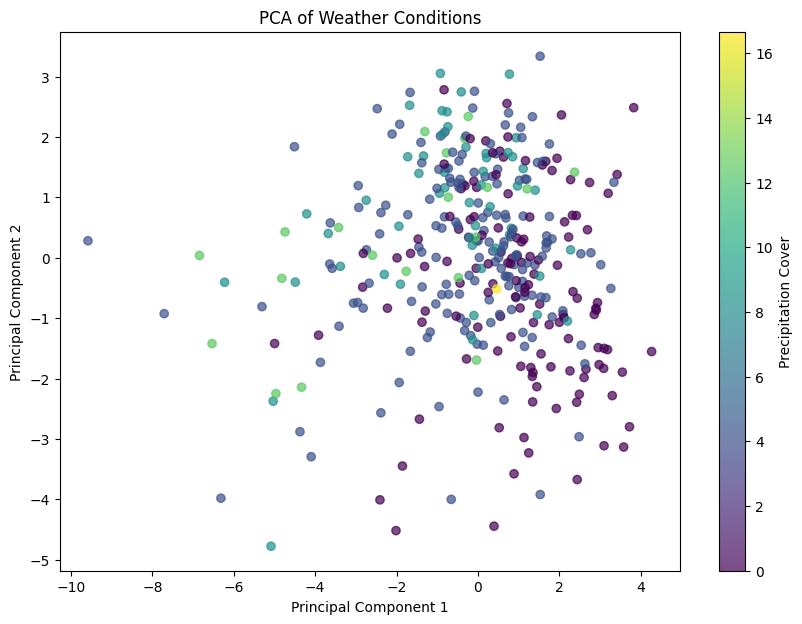

In [6]:
# Plot the PCA graph
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize by 2D Scatter Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(x_df["PC1"], x_df["PC2"], c=x_df[target].values.flatten(), cmap='viridis', alpha=0.7)
colorbar = plt.colorbar(scatter)
colorbar.set_label('Precipitation Cover')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Weather Conditions')
plt.show()

# Advantages and Disadvantages

Advantages of PCA:
<p> - Reducing the number of features and making the dataset easier to be explored and visualized
<p> - Reducing the noise in the data
<p> - Faster training time and better performance for machine learning algorithms.

<p> Disadvantages of PCA:
<p> - Causing loss of interpretability
<p> - Not always optimal


### Examples from previous dataset

We will use the previous dataset as the demonstration for the advantages and disadvantages. The demonstration will be conducted by comparing the result with and without PCA.

In [7]:
# Demonstration with PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

# Print the shape of x_train, y_train, x_test and y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(292, 2)
(292, 1)
(73, 2)
(73, 1)


In [8]:
# Train the model
model_pca = LinearRegression()
model_pca.fit(x_train, y_train)
result_pca = model_pca.predict(x_test)

# Calculate the regression metrics
mse_pca = mean_squared_error(y_test, result_pca)
r2_pca = r2_score(y_test, result_pca)

# Print the result
print(f'Mean Squared Error with PCA: {mse_pca}')
print(f'R-squared with PCA: {r2_pca}')

Mean Squared Error with PCA: 10.919632308444314
R-squared with PCA: 0.13142634936373332


In [9]:
# Demonstration without PCA
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(x_train, y_train)
result_pca = model.predict(x_test)

# Calculate the regression metrics
mse = mean_squared_error(y_test, result_pca)
r2 = r2_score(y_test, result_pca)

# Print the result
print(f'Mean Squared Error without PCA: {mse}')
print(f'R-squared without PCA: {r2}')

Mean Squared Error without PCA: 10.33351018345136
R-squared without PCA: 0.1780479039585825


### Discussing the result

We will look at the MSE and the R-squared and compare for both implementations.

In [10]:
# Print the result for both implementation again for better visual
print(f'Mean Squared Error with PCA: {mse_pca}')
print(f'R-squared with PCA: {r2_pca}')
print()
print(f'Mean Squared Error without PCA: {mse}')
print(f'R-squared without PCA: {r2}')

Mean Squared Error with PCA: 10.919632308444314
R-squared with PCA: 0.13142634936373332

Mean Squared Error without PCA: 10.33351018345136
R-squared without PCA: 0.1780479039585825


From the previous output we can identify that the MSE without PCA is lower while the R-Squared wihout PCA is higher, which represent that the result without PCA is better. With the result, we can conclude that even though PCA is a good tool for dimensionality reduction, but it still has the potential loss of information and Interpretability.